# Cuttledata tutorial

The following tutorial will walk you through the basics of using `cuttleData`. 

We will start with importing the `cuttleData` python library along with a library for plotting data. 

In [1]:
from cuttledata import CuttleData

import matplotlib as plt
%pylab inline

/home/axsys/es3773/anaconda2/envs/d2/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Populating the interactive namespace from numpy and matplotlib


Next we will specify the behavioral data folder that we want to analyze. 

In [2]:
images_folder = '2023-04-25_Bubbles_Quilt_50_25q-120s_25b-120s_alt_c2023-04-21/'

Now we will initialize `cuttleData`.

In [3]:
c = CuttleData(images_folder)

The basic way that `cuttleData` is setup is that each function takes as input the frame you want to analyze. For example below we are using `.plot_image` to plot frame 300.

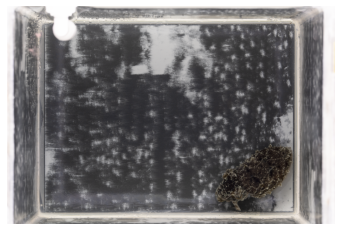

In [4]:
img = c.plot_image(300)

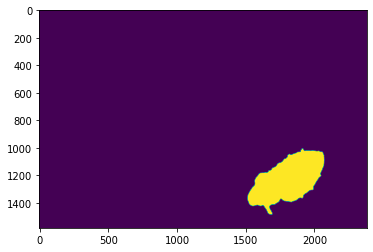

In [5]:
mantle_mask = c.get_cuttlefish_mask(300, show_image = True)

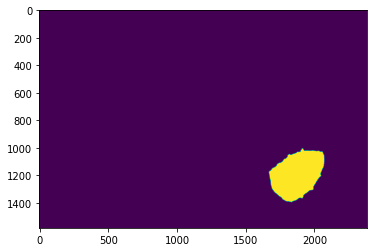

In [6]:
mantle_mask = c.get_mantle_mask(300, show_image = True)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


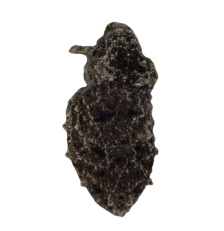

In [7]:
a =c.get_cuttlefish(300)

If you want to add a title to the image you can do so by using the title parameter: 

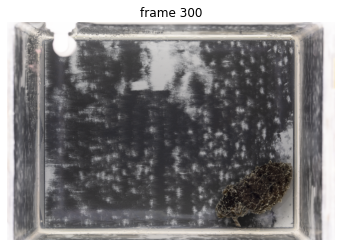

In [8]:
img = c.plot_image(300, title = 'frame 300')

If you just want the image but don't need to plot it you can use `.load_image`:

In [9]:
img = c.load_image(300)

In [10]:
np.shape(img)

(1582, 2380, 3)

## `.num_frames`

To know how many frames there are in the images_folder we can use `.num_frames()`. Note that the parenthesis are empty because we don't need to give `cuttleData` any information for it to determine the number of frames.

In [11]:
print(c.num_frames())

4486


## `.num_masks`

In [12]:
print(c.num_masks())

4486


Since the segmentation model is ran seperate from the image processing this is a useful way to double check that it has been ran -- if num_frames doesn't equal number of masks there is a n issue

Below we will walk through other useful functions 1-by-1. 

## `.get_cuttlefish`

To get just the cuttlefish: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


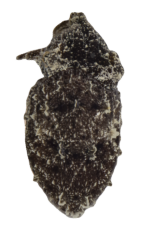

In [13]:
cf = c.get_cuttlefish(2)

Again we can give the image a title

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


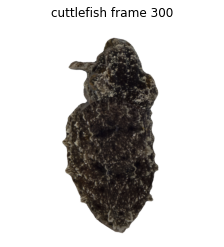

In [14]:
img = c.get_cuttlefish(300, title = 'cuttlefish frame 300')

## `.get_mantle`

To get the mantle

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


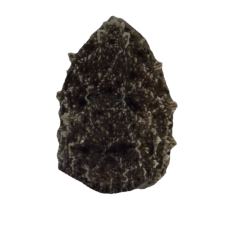

In [15]:
mantle = c.get_mantle(300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


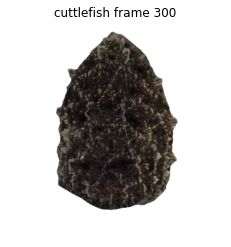

In [16]:
img = c.get_mantle(300, title = 'cuttlefish frame 300')

Let's say we want to get the cuttlefish and mantle but don't want to show the image. To do this we can use the show_image parameter. 

In [17]:
cf = c.get_cuttlefish(300, show_image = False)
mantle = c.get_mantle(300, show_image = False)

## `.get_mantle_mask`

This function returns the binary mask where pixels containing the mantle equal 1 and all other pixels are equal to 0. 

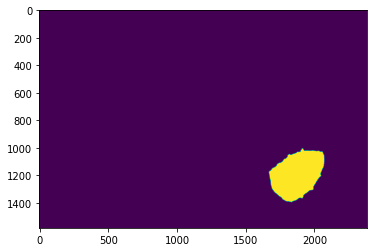

In [18]:
mantle_mask = c.get_mantle_mask(300, show_image = True)

## `.get_cuttlefish_mask`

Similar to `.get_mantle_mask` this function returns the binary mask where pixels containing the cuttlefish equal 1 and all other pixels are equal to 0. 

In [19]:
cf_mask = c.get_cuttlefish_mask(300)

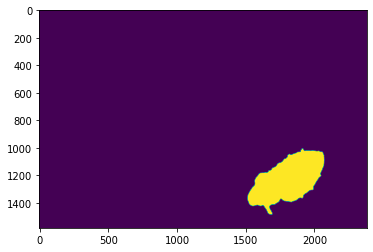

In [20]:
cf_mask = c.get_cuttlefish_mask(300, show_image = True)


## `.get_cuttlefish_pattern`

This function inscribes a rectangle into the cuttlefish and returns the contents of that rectangle. See `.plot_inscribed_rectangle` for a visual of this. 

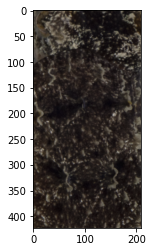

In [21]:
cf_pattern = c.get_cuttlefish_pattern(300, show_image = True)


## `.get_mantle_pattern`

This function inscribes a rectangle into the mantle and returns the contents of that rectangle. See `.plot_inscribed_rectangle` for a visual of this. 

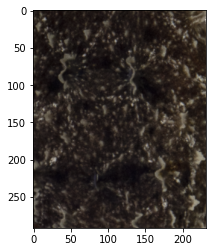

In [22]:
mantle_pattern = c.get_mantle_pattern(300, show_image = True)


## `.plot_inscribed_rectangle` 

Function for visualizing what part of the cuttlefish is being extracted when a rectangle is inscribed in it.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


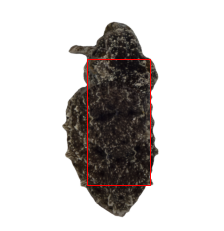

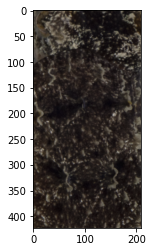

In [23]:
cf_pattern = c.plot_inscribed_rectangle(300)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


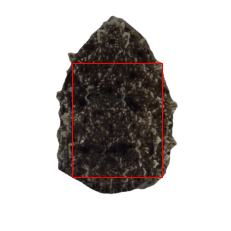

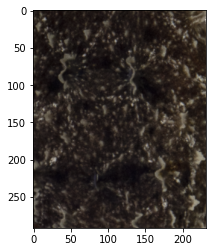

In [24]:
mantle_pattern = c.plot_inscribed_rectangle(300, cf = False)

## `.get_background_pattern`

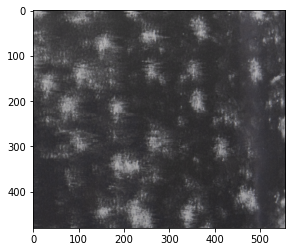

In [25]:
bg_pattern = c.get_background_pattern(300)

## `.plot_background_pattern`

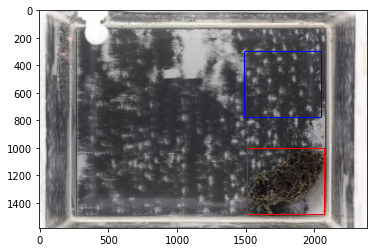

In [26]:
c.plot_background_pattern(300)

## `.get_bounding_box_center`

We may want to know where the cuttlefish is in the tank. We can use this function to determine that. It returns the centerpoint of the cuttlefish in a given frame. 


In [27]:
x,y = c.get_bounding_box_center(300)

In [28]:
print(x,y)

1790.5 1244.0


We can compare these x,y values to the mask and sanity check it.

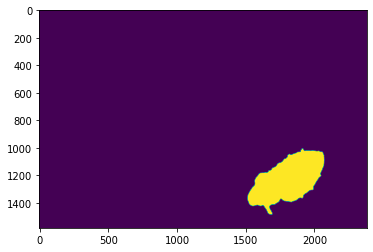

In [29]:
cf_mask = c.get_cuttlefish_mask(300, show_image = True)

## `.distance`

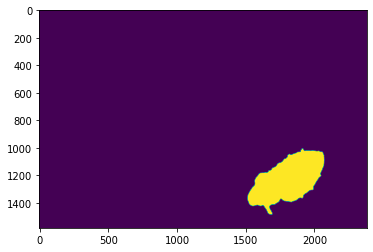

In [30]:
i1 = c.get_cuttlefish_mask(300, show_image = True)

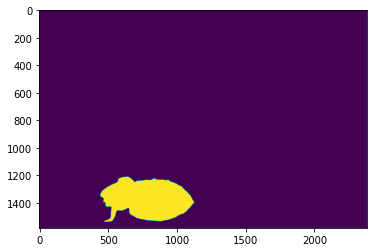

In [31]:
i1 = c.get_cuttlefish_mask(4000, show_image = True)

Below are two masks at time points (frames) 300 and 4000. We see that the cuttlefish moved between these frames. We can use the distance function to determine the Euclidean distance that the cuttlefish moved between these two frames. 

## `.plot_bounding_box`

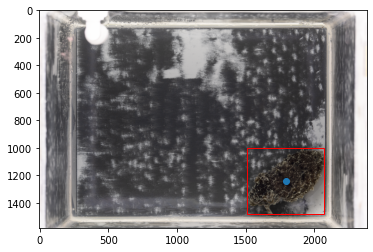

In [32]:
c.plot_bounding_box(300)

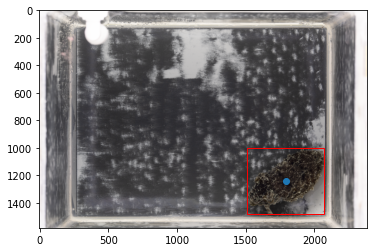

In [33]:
c.plot_bounding_box(301)

Note that the order doesn't matter because of the way Euclidean distance is computed. 

In [34]:
c.distance(4000, 300)

1014.1736784200228

The normal use case of this function is to compute the distance between two consecutive frames. To do this you can just give the function one frame number and it will compute the distance between that frame and the next frame. For example if you do `c.distance(300)` the function will return the distance between frame 300 and 301.

In [35]:
c.distance(300)

0.7071067811865476

Looking at the masks below we can see that this makes sense -- the animal didn't move much between frame 300 and 301.

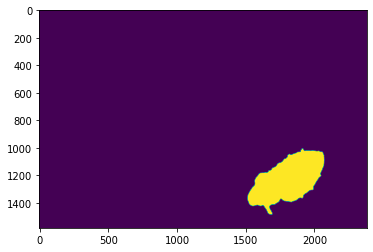

In [36]:
i1 = c.get_cuttlefish_mask(300, show_image = True)

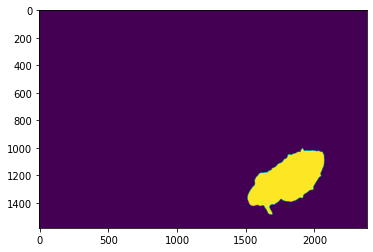

In [37]:
i1 = c.get_cuttlefish_mask(301, show_image = True)

## `.mean_image`

In [38]:
mean_image = c.mean_image(300)

In [39]:
print(mean_image)

109.18220420911727


##  `.mean_rgb`

Compute the mean RGB value of the cuttlefish: 

In [40]:
mean_rgb = c.mean_rgb(300)

If instead we want to compute the mean RGB value of the mantle we can pass the parameter cf = False. 

In [41]:
mean_rgb_mantle = c.mean_rgb(300, cf = False)

## `.mean_bg`

In [42]:
mean_bg = c.mean_bg(300)

In [43]:
print(mean_bg)

66.97626047277079


## `.angle`

Compute the angle between the x-axis and the minor axis of the ellipse.

In [44]:
angle = c.angle(300)

## `.texture_statistics`

Compute the texture statistics of the mantle pattern. Alternatively you can compute the texture statistics of the cuttlefish pattern by setting `cf = True`.

In [45]:
mantle_stats = c.texture_statistics(300)

Compute the texture statistics of the background pattern.

In [46]:
bg_stats, bg_stat_labels =  c.texture_statistics(300, background = True)

# More advanced functions

## `.get_values_across_session`

This function loops over all frames in a given session and computes the value of whatever function you pass it.

For example you could pass it `c.get_bounding_box_center` and it would compute all the center points and return a list of these points. This is useful for quantifying where the cuttlefish was in the tank across the session. For instance did it spend a lot of time under the outflow? This function is set up to only ever have to compute the values once. If it's the first time it has been run for a given session it may take a bit of time because it has having to loop over all ~4000 frames. However, after it is done running the data is saved and the next time this function is called the data will just be loaded and returned and therefore be much faster! 

Something to note with this function is that it needs a way to handle cases where we don't have a mask for the cuttlefish. If we don't have a mask and therefore can't compute the center point it defaults to saying the cuttlefish is in the same location as it was on the previous frame.

### Example get mean rgb values across session

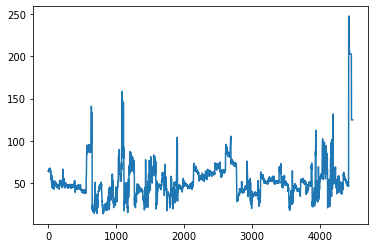

In [47]:
values = c.get_values_across_session(c.mean_rgb)
plt.plot(values)
plt.show()

### Example get bounding box center across session and plot density plot

In [49]:
values = c.get_values_across_session(c.get_bounding_box_center)

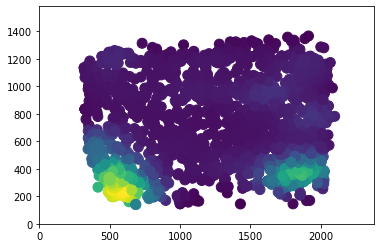

In [50]:
c.plot_density_scatter(values)

# Difficulty computing background 


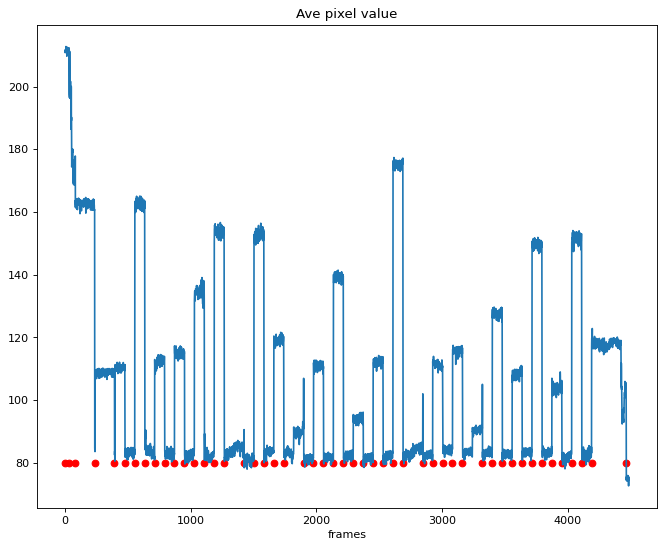

In [51]:
vals = c.get_values_across_session(c.mean_image)

# Estimate change points
change_points =[0]
for ii in range(len(vals)-1):
    if np.abs(vals[ii+1]-vals[ii])>10 and ii-change_points[-1]>30:
        change_points.append(ii)
        
figure(figsize=(10, 8), dpi=80)
plt.plot(vals)
plt.title('Ave pixel value')
plt.xlabel('frames')
plt.scatter(change_points, [80]*50, color='r')

- One issue is that imaging doesn't start with the first stimulus and doesn't end with last 

In [52]:
images_folder = '2023-04-28_Bubbles_Quilt_50_25q-120s_25b-120s_alt_c2023-04-21/'

In [53]:
c = CuttleData(images_folder)

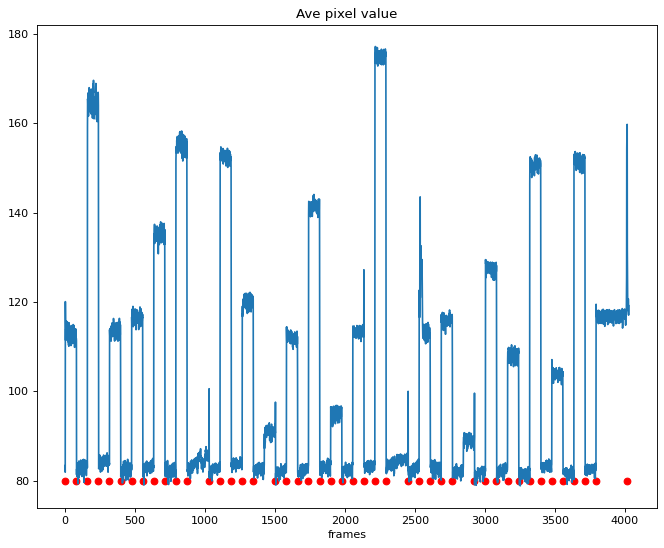

In [54]:
vals = c.get_values_across_session(c.mean_image)

# Estimate change points
change_points =[0]
for ii in range(len(vals)-1):
    if np.abs(vals[ii+1]-vals[ii])>10 and ii-change_points[-1]>30:
        change_points.append(ii)
        
        

figure(figsize=(10, 8), dpi=80)
plt.plot(vals)
plt.title('Ave pixel value')
plt.xlabel('frames')
plt.scatter(change_points, [80]*len(change_points), color='r')

In [55]:
[[change_points[ii+1]-change_points[ii], change_points[ii],vals[change_points[ii]+1]] for ii in range(len(change_points)-1)]

[[81, 0, 81.91439097762999],
 [78, 81, 81.35983234001566],
 [79, 159, 159.05341481725432],
 [79, 238, 111.16114782196064],
 [79, 317, 113.78287155570193],
 [79, 396, 100.67881639381416],
 [79, 475, 116.60268771225304],
 [79, 554, 100.0364048274177],
 [79, 633, 132.2657390389784],
 [79, 712, 102.92649528838083],
 [79, 791, 151.77674476870394],
 [158, 870, 97.37892519839794],
 [79, 1028, 100.56968920311488],
 [79, 1107, 153.20376584262024],
 [79, 1186, 95.41737535722254],
 [79, 1265, 118.0465563216437],
 [159, 1344, 91.71511967618906],
 [78, 1503, 80.46182632344973],
 [80, 1581, 114.38544656800774],
 [78, 1661, 82.1171875829978],
 [79, 1739, 139.73319876623216],
 [79, 1818, 99.01383721630245],
 [80, 1897, 96.5475599974503],
 [78, 1977, 80.57961140208296],
 [79, 2055, 114.58658242057885],
 [79, 2134, 127.18950004780673],
 [79, 2213, 174.87215098428752],
 [158, 2292, 119.93232815249993],
 [79, 2450, 99.99169296036999],
 [79, 2529, 117.6339970501475],
 [79, 2608, 96.62280363472823],
 [79, 2